Setup

In [18]:
!pip install -r ../requirements.txt
import visualising_poetry as vp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sn
vp.setup_if_needed()

df = vp.pickle_as_single_data_frame()

# create a data frame of poems identified as copies
dups_df = df[df['ref no'].notnull()]

## Duplicates
Scatter graph to show the number of poems identified as duplicates.

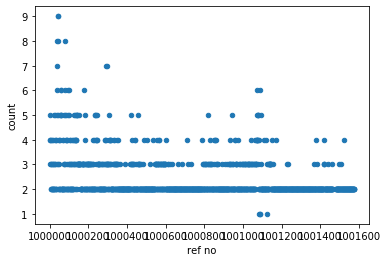

In [19]:
# create a subset sorted by ref no
dups_df_sorted = dups_df[['ref no', 'publication title', 'year', 'month', 'day', 'first line']].sort_values(by=['ref no', 'year', 'month', 'day'])

# count the duplicates
dups_count = dups_df_sorted.groupby('ref no')['first line'].count()
dups_count_df = dups_count.to_frame().reset_index().rename(columns= {'first line': 'count'})
dups_count_df.plot(kind='scatter', x='ref no', y='count')
plot.show()

## Suspects

Show the individual (suspect) poems


In [20]:
singles = dups_count_df.query("count == 1")['ref no']

dups_df.loc[dups_df['ref no'].isin(singles)][['ref no', 'publication title', 'year', 'first line']].sort_values('first line')

,ref no,publication title,year,first line
2432,1001087,London Magazine,1741,Blind bards pray what is the reason
166,1001085,London Evening Post,1742,From this famed fountain freedom flowed
2481,1001088,London Magazine,1741,Hail lovely sex by nature formed to please
16,1001123,London Daily Post and General Advertiser,1740,Say more there needs not and say less who can


## Matrix / heat map

This matrix / heatmap shows the number poems that were shared between publications. The score does not include the 
poem being republished by the same publication.

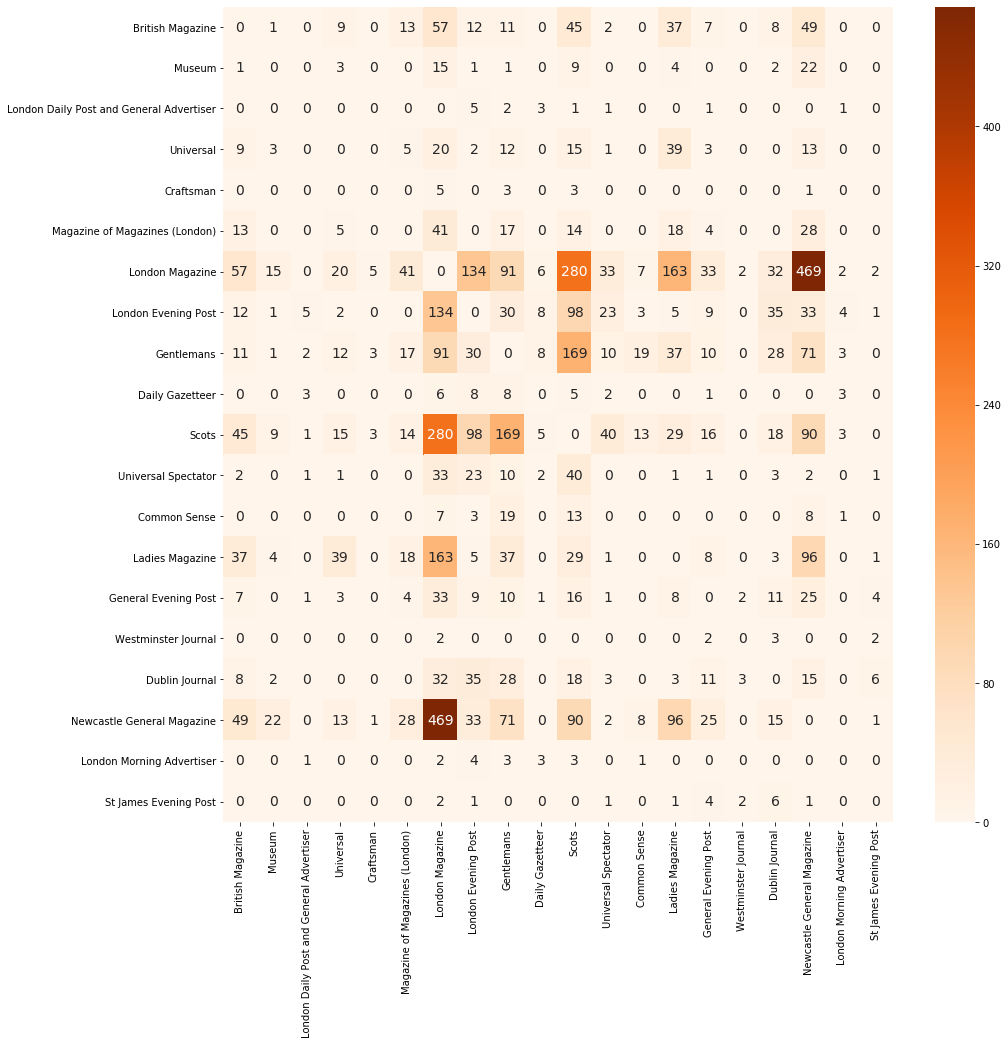

In [21]:
# get the titles of the publications
pubs = dups_df['publication title'].unique()

# create a matrix (publications used on axes) and set the values to 0
dups_matrix_df = pd.DataFrame(np.zeros(shape=(pubs.size, pubs.size)), columns=pubs, index=pubs)

# group by ref number
dups_grouped = dups_df.groupby('ref no')

# go through the groups and update matrix
for group_name, df_group in dups_grouped:
    # go through the publication on one axis
    for pub_x in df_group['publication title'].unique():
        # go through the group on the other axes
        for pub_y in df_group['publication title'].unique():
            # increment score if the publications don't match
            if pub_y != pub_x:
                dups_matrix_df.at[pub_x, pub_y] += 1


plot.figure(figsize=(15, 15))
sn.heatmap(dups_matrix_df, cmap='Oranges', annot=True, fmt='g', annot_kws={'size':14})
plot.show()

